# Auxiliary Telescope Optical Geometry for CTIO

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : January 13th 2017
- update :


Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating

## Constants for conversions

In [1]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [2]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [3]:
deg_to_rad=N(pi)/180.

In [53]:
rad_to_deg=1/deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin

## Configuration parameters
----------------------------------

#### Telescope

In [5]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

In [6]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### Grating

In [7]:
Ronchi_r=400 # number of lines per mm
Ronchi_a=mm_to_m/Ronchi_r  # line spacing in meter unit
Ronchi_size=2*inch_to_mm*mm_to_m # size of Ronchi Grating in meter
Ronchi_N=Ronchi_size/Ronchi_a   # total number of lines (not used)

#### Filter

In [8]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD Detector

In [9]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

In [10]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [11]:
print "pixel viewing angle in arcsec = ", Det_pix_angl*rad_to_deg*arcdeg_to_arcsec

pixel viewing angle in arcsec =  0.392885345232565


### Beam size at filter position


In [12]:
def Y(x):
    y=Tel_Diameter/2.*(1-x/Tel_Focal_Length)
    return y

In [13]:
#def y(x,z):
#    y=Tel_Diameter/2.*(1-x/Tel_Focal_Length)
#    return y

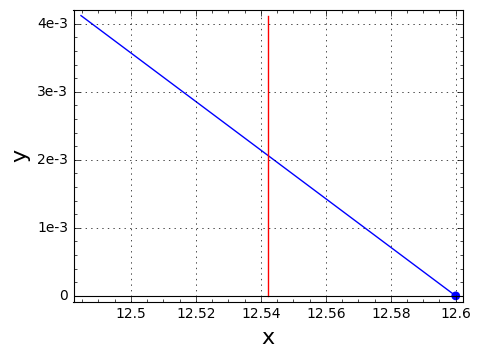

In [14]:
Ymax=Y(Tel_Focal_Length-2*Filt_D)
FocalP=point((Tel_Focal_Length, 0), size=40)
p1=plot(Y(x),(x,Tel_Focal_Length-2*Filt_D,Tel_Focal_Length),figsize=(15,8),frame=True,gridlines=True,axes_labels=['x','y'])
Filter=line( [(Tel_Focal_Length-Filt_D,0),(Tel_Focal_Length-Filt_D,Ymax)], color="red",thickness=1)
p=FocalP+p1+Filter
show(p, figsize=5,aspect_ratio=None)

In [15]:
YatFilter=Ymax=Y(Tel_Focal_Length-Filt_D)

In [16]:
print "Beam size at Filter = ",YatFilter*m_to_mm,' mm'

Beam size at Filter =  2.06035714285709  mm


## Incident angle of beam

In [17]:
Beam_angle=atan(Tel_Diameter/2./Tel_Focal_Length) # beam incident angle in radian

In [18]:
print 'Beam_angle = ', Beam_angle, ' rad'
print 'Beam_angle = ', Beam_angle*rad_to_arcsec, ' arcsec'

Beam_angle =  0.0356991126793240  rad
Beam_angle =  7363.47055999402  arcsec


## Number of grating lines in the optical beam

In [19]:
Ronchi_NbLines_in_Beam=YatFilter*m_to_mm*Ronchi_r

In [20]:
print "Number of Ronchi grating lines in optical beam = ",Ronchi_NbLines_in_Beam

Number of Ronchi grating lines in optical beam =  824.142857142838


## Ronchi Grating Dispersion Law
-------------------------------
We know the dispersion law of the light intensity is done according the law:

$$
I(\theta) = \frac{I_0}{N^2} \left( \frac{\sin \beta}{\beta} \right)^2 \cdot \left( \frac{\sin N \alpha}{\sin \alpha} \right)^2
$$

where
$$
\begin{array} {ccc}
\alpha & = & \frac{\pi a }{\lambda} \sin \theta \\
\beta & = & \frac{\pi b }{\lambda} \sin \theta
\end{array}
$$
- $\theta$ is the angle of dispersion
- $\lambda$ is the wavelength
- $a$ is the line groove pitch of Ronchi grating
- $b$ is the line width of Ronchi Gration

### For oblique incidence

$$
a(\sin \theta_m - \sin \theta_i) = m\lambda \\
\theta_m = arcsin(m\frac{\lambda}{a}+\sin \theta_i)
$$

In [21]:
var("th b wl")
def diffrac_pattern(th,b,wl):
    '''
    diffrac_pattern:
    Compute the diffraction pattern
    - th : the angle of diffraction in rad
    - b : the width of the slot in m
    - wl : the wavelength in m
    '''
    beta=pi*b/wl*sin(th)
    sinus_card=sin(beta)/beta
    return sinus_card^2

In [22]:
var("th a wl N")
def interference_pattern(th,a,wl,N):
    """
    Interference_pattern:
    Compute the diffrac pattern
    - th : the angle of diffraction in rad
    - b : the width of the slot in m
    - wl : the wavelength in m
    
    """
    
    alpha=pi*(a/wl)*sin(th)
    numer=sin(N*alpha)
    denom=sin(alpha)
    ratio=numer/denom
    return ratio^2/NN^2

In [23]:
var("th a b wl N")
def ronchi_pattern(th,a,b,wl,N):
    prod=diffrac_pattern(th,b,wl)*interference_pattern(th,a,wl,N)
    return prod

## End of Beam on Focal Surface


In [24]:
import numpy as np

In [25]:
angle=5*arcmin_to_arcdeg*deg_to_rad

In [26]:
def PlotEndBeam(df,k,N,ratio=1):
    '''
    vertical planes:
    (x0,y0) : telescope aperture
    (x1,y1) : plane after converging lense, where the plot start on left
    (x2,y2) : plane where is installed the grating
    (x3,y3) : focal plane where the ccd is installed 
    df : distance focal plane - filter wheel  df=x3-x2
    k>1  : multiplicative factor such x3-x2= k*df
    N : number of optical rays lines
    ratio : aspect ratio
    '''
    
    title='Beam Focalisation for $\\theta$ $=0^o$ '
    df=df*m_to_cm # convert all length into cm
    
    y2max=1/Tel_Fnum/2.*df # y2max of optical beam at  ronchi grating plane
    y2=np.linspace(-y2max,y2max,N)  # distribute regularly spaced y2 for rays at ronchi plane
    
    optical_obj= [] # container of graphics object
    
    FocalP=point((df, 0), size=40) # Focal Point
    optical_obj.append(FocalP)
   
    ronchi_size=Ronchi_size*m_to_cm
    det_size=Det_size*0.1

       #axes
    #optical_obj.append(line( [(-k*df+df,0),(df,0)], color="black",thickness=1))
    #optical_obj.append(line( [(0,-det_size/2.),(0,det_size/2.)], color="black",thickness=1))
    
   
    
    # add the ronchi and ccd as thick vertical lines
    ronchi=line([(0,-ronchi_size/2),(0,ronchi_size/2.)],color="blue",thickness=3)
    ccd=line([(df,-det_size/2),(df,det_size/2.)],color="green",thickness=3)
    
    optical_obj.append(ronchi)
    optical_obj.append(ccd)
    
    #compute 2N optical rays lines
    for i in range(N):
        optical_obj.append(line( [(-k*df+df,k*y2[i]),(0,y2[i])], color="red",thickness=1))
        optical_obj.append(line( [(0,y2[i]),(df,0)], color="red",thickness=1))
      
    NbObj=len(optical_obj)
    
    # sums the graphical objects
    for i in range(NbObj):
        if(i==0):
            p=optical_obj[i]
        else:
            p=p+optical_obj[i]
    # show all the object        
    show(p, title=title,figsize=8,aspect_ratio=ratio,frame=True,gridlines=True,axes_labels=['x (cm)','y (cm)'])
        

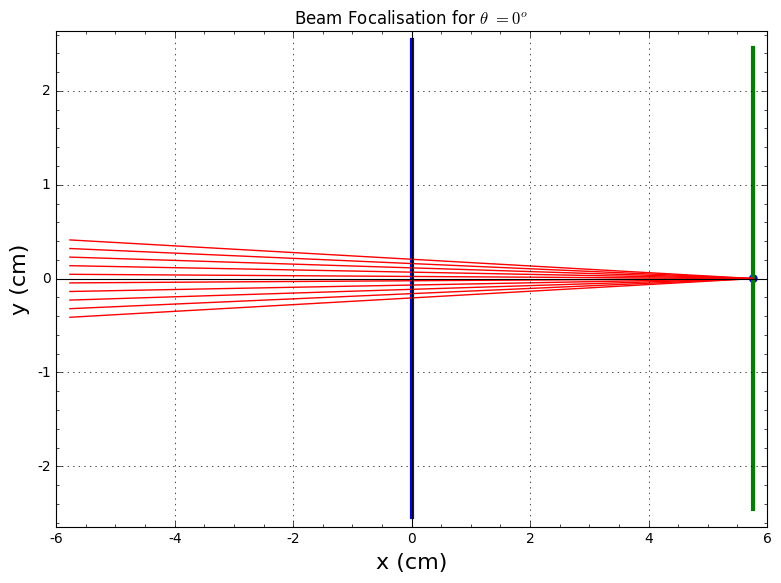

In [28]:
PlotEndBeam(Filt_D,2,10,ratio=None)

### 1) determination du point focal

- soit $f$ la distance focale
- soit $d_f$ la distance filtre-ccd
- soit $\theta$ l'angle incident
- la position du point focal est

$$
(x_3=f, y3=f\tan \theta)
$$


### 2) position $y$ pour $x=x_0,x_1,x_2,x_3$ 

- let $\alpha$ the angle of any ray beam.

$$
\tan \alpha = \frac{y_3-y_0}{f}
$$

so

$$
\left\{
\begin{array}{ccl}
y_0 & = & y_3-f \tan \alpha  \\
y_1 & = & y_3-k\cdot d_f \cdot  \tan \alpha  \\
y_2 & = & y_3- d_f \cdot  \tan \alpha  
\end{array}
\right.
$$

or

$$
\left\{
\begin{array}{ccl}
y_1 & = & (1-\frac{k.d_f}{f})\cdot y_3 +\frac{k.d_f}{f}\cdot y_0  \\
y_2 & = & (1-\frac{d_f}{f})\cdot y_3 +\frac{d_f}{f}\cdot y_0  \\
\end{array}
\right.
$$

so
$$
\left\{
\begin{array}{ccl}
y_2^{max} & = & (1-\frac{d_f}{f})\cdot y_3 + \frac{d_f\cdot D}{2f} \\
y_2^{min} & = & (1-\frac{d_f}{f})\cdot y_3 - \frac{d_f\cdot D}{2f}
\end{array}
\right.
$$






In [58]:
def PlotEndBeamAngl(th,df,k,N,ratio=1):
    '''
    th: theta
    vertical planes:
    (x0,y0) : telescope aperture
    (x1,y1) : plane after converging lense, where the plot start on left
    (x2,y2) : plane where is installed the grating
    (x3,y3) : focal plane where the ccd is installed 
    df : distance focal plane - filter wheel  df=x3-x2
    k>1  : multiplicative factor such x3-x2= k*df
    N : number of optical rays lines
    ratio : aspect ratio
    '''
    thdeg=th*rad_to_arcmin
    title=' $\\theta =$ {} arcmin'.format(int(thdeg))
    
    df=df*m_to_cm # convert into cm
    f=Tel_Focal_Length*m_to_cm # focal length in cm
    rad=Tel_Diameter*m_to_cm/2.
    
    y3=f*tan(th) # find the y of the focal point in cm
    
    y2max=y3*(1-df/f) + df/f*rad # maximum y at x2=f-df (filter plane)
    y2min=y3*(1-df/f) - df/f*rad # maximum y at x2=f-df (filter plane)

    y2=np.linspace(y2min,y2max,N) #generate the ordinate in filter plane
    
    optical_obj= []
    
    FocalP=point((df, y3), size=40) # Focal Point
    optical_obj.append(FocalP)
    
    ronchi_size=Ronchi_size*m_to_cm
    det_size=Det_size*0.1
    
    #axes
    #optical_obj.append(line( [(-k*df+df,0),(df,0)], color="black",thickness=1))
    #optical_obj.append(line( [(0,-det_size/2.),(0,det_size/2.)], color="black",thickness=1))
    
    
    
    ronchi=line([(0,-ronchi_size/2),(0,ronchi_size/2.)],color="blue",thickness=3)
    ccd=line([(df,-det_size/2),(df,det_size/2.)],color="green",thickness=3)
    
    optical_obj.append(ronchi)
    optical_obj.append(ccd)
    
    for i in range(N):
        optical_obj.append(line( [(-k*df+df,k*y2[i]-(k-1)*y3),(0,y2[i])], color="red",thickness=1))
        optical_obj.append(line( [(0,y2[i]),(df,y3)], color="red",thickness=1))
      
    NbObj=len(optical_obj)
    
    for i in range(NbObj):
        if(i==0):
            p=optical_obj[i]
        else:
            p=p+optical_obj[i]
            
    show(p, title=title,figsize=8,aspect_ratio=ratio,frame=True,gridlines=True,axes_labels=['x (cm)','y (cm)'])
        
    

y2max =  2.03024204480891
y2min =  1.61817061623748


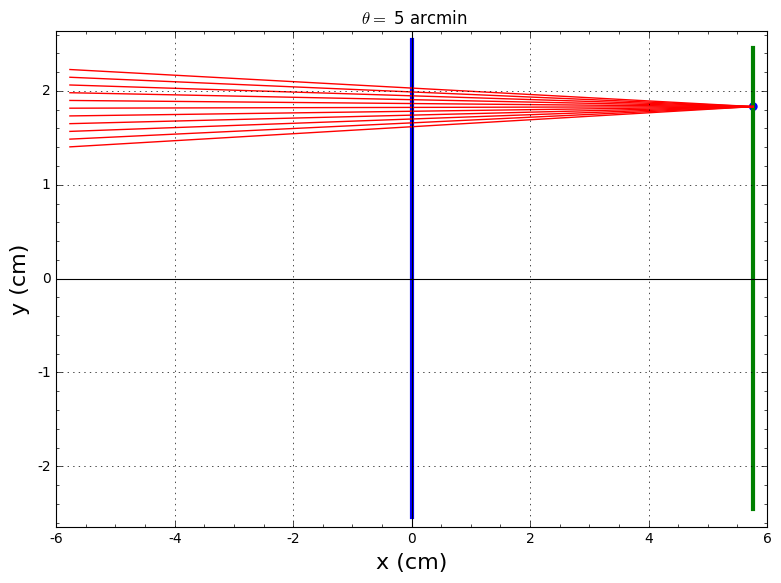

In [59]:
PlotEndBeamAngl(angle,Filt_D,2,11,ratio=None)

In [56]:
def PlotEndBeamGrating(df,k,N,wl=800.,ratio=1):
    


    title=' $\\theta =$ 0 arcmin, ronchi grating {} lines/mm, $\lambda = {}$ nm'.format(Ronchi_r,int(wl))
    
    df=df*m_to_cm # convert into cm
    y2max=1/Tel_Fnum/2.*df
    y2=np.linspace(-y2max,y2max,N)
    
    optical_obj= []
    
    
    
    FocalP=point((df, 0), size=40) # Focal Point
    optical_obj.append(FocalP)
    
    ronchi_size=Ronchi_size*m_to_cm
    det_size=Det_size*0.1
    
    #axes
    #optical_obj.append(line( [(-k*df+df,0),(df,0)], color="black",thickness=1))
    #optical_obj.append(line( [(0,-det_size/2.),(0,det_size/2.)], color="black",thickness=1))
    
    ronchi=line([(0,-ronchi_size/2),(0,ronchi_size/2.)],color="blue",thickness=3)
    ccd=line([(df,-det_size/2),(df,det_size/2.)],color="green",thickness=3)
    
    optical_obj.append(ronchi)
    optical_obj.append(ccd)
    
 
    
    for i in range(N):
        optical_obj.append(line( [(-k*df+df,k*y2[i]),(0,y2[i])], color="red",thickness=1))
        optical_obj.append(line( [(0,y2[i]),(df,0)], color="red",thickness=1,linestyle="--"))
        length=np.sqrt(y2[i]**2+df**2)      # length of ray in air
        alpha=atan(y2[i]/df)                # incident angle on Ronchi
        theta_in=asin(wl*nm_to_m/Ronchi_a)# dispersion angle     
        #theta_out= theta_in+alpha
        #y3=y2[i]-df*tan(theta_out)
        
        theta_out=arcsin(sin(alpha)+wl*nm_to_m/Ronchi_a)
        y3=y2[i]-df*tan(theta_out)
        
        #theta_out=alpha-theta_in
        #y3=-(y2[i]-df*tan(theta_out))
        
        optical_obj.append(line( [(0,y2[i]),(df,y3)], color="blue",thickness=1))
            
    NbObj=len(optical_obj)
    
    for i in range(NbObj):
        if(i==0):
            p=optical_obj[i]
        else:
            p=p+optical_obj[i]
            

            
    show(p,title=title,figsize=8,aspect_ratio=ratio,frame=True,gridlines=True,axes_labels=['x (cm)','y (cm)'])
        
    

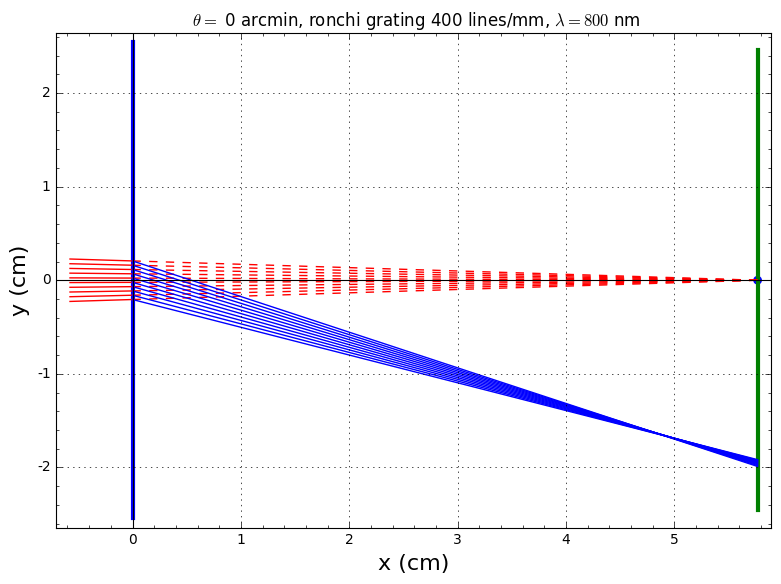

In [57]:
PlotEndBeamGrating(Filt_D,1.1,10,wl=800.,ratio=None)

In [54]:
def PlotEndBeamAnglGrating2(th,df,k,N,wl=600.,ratio=1):
    '''
    th: theta
    vertical planes:
    (x0,y0) : telescope aperture
    (x1,y1) : plane after converging lense, where the plot start on left
    (x2,y2) : plane where is installed the grating
    (x3,y3) : focal plane where the ccd is installed 
    df : distance focal plane - filter wheel  df=x3-x2
    k>1  : multiplicative factor such x3-x2= k*df
    N : number of optical rays lines
    ratio : aspect ratio
    '''
    thdeg=th*rad_to_arcmin
    title=' $\\theta =$ {} arcmin, ronchi grating {} lines/mm, $\lambda = {}$ nm'.format(int(thdeg),Ronchi_r,int(wl))
    
    df=df*m_to_cm # convert into cm
    f=Tel_Focal_Length*m_to_cm # focal length in cm
    rad=Tel_Diameter*m_to_cm/2.
    
    y3=f*tan(th) # find the y of the focal point in cm
    
    y2max=y3*(1-df/f) + df/f*rad # maximum y at x2=f-df (filter plane)
    y2min=y3*(1-df/f) - df/f*rad # maximum y at x2=f-df (filter plane)
    
    y2=np.linspace(y2min,y2max,N) #generate the ordinate in filter plane
    
    optical_obj= []
    
    FocalP=point((df, y3), size=40) # Focal Point
    optical_obj.append(FocalP)
    
    ronchi_size=Ronchi_size*m_to_cm
    det_size=Det_size*0.1
    
    #axes
    #optical_obj.append(line( [(-k*df+df,0),(df,0)], color="black",thickness=1))
    #optical_obj.append(line( [(0,-det_size/2.),(0,det_size/2.)], color="black",thickness=1))
    
    
    
    ronchi=line([(0,-ronchi_size/2),(0,ronchi_size/2.)],color="blue",thickness=3)
    ccd=line([(df,-det_size/2),(df,det_size/2.)],color="green",thickness=3)
    
    optical_obj.append(ronchi)
    optical_obj.append(ccd)
    
    for i in range(N):
        optical_obj.append(line( [(-k*df+df,k*y2[i]-(k-1)*y3),(0,y2[i])], color="red",thickness=1))
        optical_obj.append(line( [(0,y2[i]),(df,y3)], color="red",thickness=1,linestyle='--'))
        alpha=atan((y3-y2[i])/df)
        theta_out=arcsin(sin(alpha)-wl*nm_to_m/Ronchi_a)
        newy3=y2[i]+df*tan(theta_out)

        
        optical_obj.append(line( [(0,y2[i]),(df,newy3)], color="blue",thickness=1))
        
    NbObj=len(optical_obj)
    
    for i in range(NbObj):
        if(i==0):
            p=optical_obj[i]
        else:
            p=p+optical_obj[i]
            
    show(p, title=title,figsize=8,aspect_ratio=ratio,frame=True,gridlines=True,axes_labels=['x (cm)','y (cm)'])
        
    

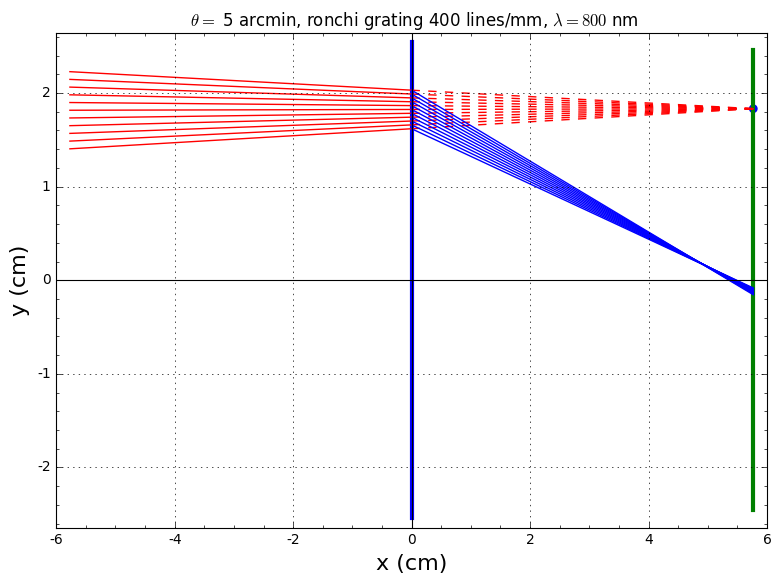

In [55]:
PlotEndBeamAnglGrating2(angle,Filt_D,2,11,wl=800.,ratio=None)